In [53]:
from srcmodules.SceneFieldFeatures import SceneFieldFeatures
from srcmodules.Scenes import Scene
import numpy as np
import matplotlib.pyplot as plt

### Test Gaussian
Core functions.
Parameters to customize:
- Sigma: (sigma=0.2 as default), How important are models based to distance size

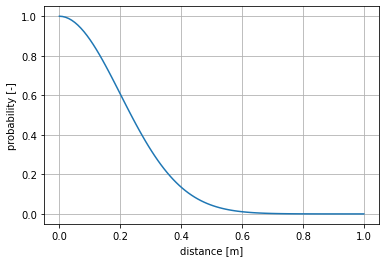

In [50]:
x = np.linspace(0, 1, 100)
y = Features.gaussian(x)
plt.plot(x,y)
plt.xlabel("distance [m]")
plt.ylabel("probability [-]")
plt.grid()
plt.show()

### Test sigmoid
It is a inverted sigmoid function. Parameters to customize:
- center (center=0.14 as default), feasibility breaks, e.g. p=0.5
- tau (tau=40 as default), steepness

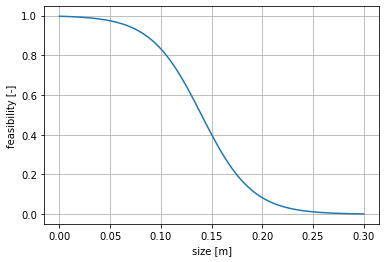

In [52]:
x = np.linspace(0, 0.3, 100)
y = Features.sigmoid(x)
plt.plot(x,y)
plt.xlabel("size [m]")
plt.ylabel("feasibility [-]")
plt.grid()
plt.show()

### Test object size field 
- Importance based on size of the object (of interaction - grab)
- E.g. size of first object is changing (growing) and feasibility of grab is getting smaller

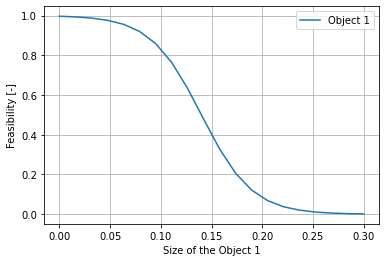

In [49]:
s = Scene(init='drawer,cup,object')

sizes_test = np.linspace(0, 0.3, 20)
feaf_plot = []
for i in sizes_test:
    s.objects[0].size = i
    
    feaf = Features.feaf__feature(np.array([obj.size for obj in s.objects]), s.r.gripper_range)
    feaf_plot.append(feaf)

feaf_plot = np.array(feaf_plot)
plt.plot(sizes_test, feaf_plot[:,0])
plt.legend(['Object 1'])
plt.xlabel("Size of the Object 1")
plt.ylabel("Feasibility [-]")
plt.grid()
plt.show()

### Test focus point field & end-effector field

- Importance based on objects' distance to focus point position or eef position
- E.g. The plot represents the importance based on changing the first object position

[3.72665317e-06 4.57833362e-01]
[2.74310467e-04 4.57833362e-01]
[0.00597602 0.45783336]
[0.04972487 0.45783336]
[0.1978987  0.45783336]
[0.45783336 0.45783336]
[0.72614904 0.45783336]
[0.90370708 0.45783336]
[0.98019867 0.45783336]
[0.99875078 0.45783336]


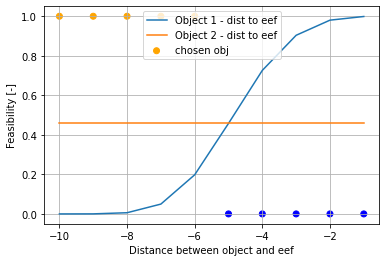

In [47]:
s = Scene(init='cup,cup')
s.cup.position = np.array([-0.5,0.,0.])
s.cup1.position = np.array([0.5,0.,0.])
s.r.eef_position = np.array([0,0.,0.])

def color_coding(i):
    if i == 0:
        return 'blue'
    elif i == 1:
        return 'orange'

x = []
y = []
scatter_max = []
for i in range(-10, 0):
    s.cup.position[0] = i/10
    s.cup1.position[0] = 0.5
    
    eeff = Features.eeff__feature(s.object_positions, s.r.eef_position)
    print(eeff)
    x.append(i)
    y.append(eeff)
    scatter_max.append(np.argmax(eeff))
    
    
eeff = np.array(eeff)
plt.plot(x, y)
plt.scatter(x, scatter_max, color=[color_coding(i) for i in scatter_max])
plt.legend(['Object 1 - dist to eef', 'Object 2 - dist to eef', 'chosen obj'])
plt.xlabel("Distance between object and eef")
plt.ylabel("Feasibility [-]")
plt.grid()
plt.show()